In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("archive/HousingData.csv")

In [4]:
df.dropna(inplace=True)

In [5]:
df1=df.dropna()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


Independent Feature and dependent features

In [7]:
X=df1
y=df1.MEDV

In [8]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01,12.7
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80,18.4
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

In [14]:
X_train

array([[-0.3272605 , -0.48865541, -0.42018128, ...,  0.40288864,
         0.11593724, -0.2567857 ],
       [ 0.04316861, -0.48865541,  1.04820426, ..., -3.55599998,
         0.81143377, -1.03651184],
       [-0.3349325 , -0.48865541, -0.42018128, ...,  0.35532602,
        -0.02235647, -0.39239024],
       ...,
       [-0.40693189, -0.48865541, -0.97303729, ...,  0.3314929 ,
        -0.32713969, -0.49409365],
       [ 0.49545863, -0.48865541,  1.04820426, ...,  0.44817157,
         0.69327992, -0.87830653],
       [-0.40092822, -0.48865541,  2.16128768, ...,  0.25325809,
         0.66642677, -0.15508229]])

In [16]:
from sklearn.linear_model import Ridge
# Cross validation
from sklearn.model_selection import GridSearchCV

In [17]:
ridge_regressor=Ridge()

In [18]:
ridge_regressor

Ridge()

In [20]:
parameters={'alpha':[1,2,3,5,10,20,30,50,100,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 50, 100, 80, 90]},
             scoring='neg_mean_squared_error')

In [22]:
print(ridgecv.best_params_)

{'alpha': 1}


In [23]:
print(ridgecv.best_score_)

-0.00982856060945161


In [25]:
ridge_pred=ridgecv.predict(X_test)

In [27]:
ridge_pred

array([25.07409888, 18.57473402, 21.01538973, 23.61169464, 17.51510551,
       33.8100284 , 19.74429109, 24.89317038, 32.01200507, 14.02024829,
       21.70566268, 49.84300266, 16.58905426, 19.94229176, 20.56412931,
       24.03646725, 19.36076656, 17.16961588, 49.52190975, 11.0517566 ,
       18.20370814, 16.86118539, 12.67053303, 24.08805265, 22.65531003,
       17.38017772, 22.08466061, 30.81043731, 20.35589384, 22.67388504,
       49.84073535, 14.65636803, 49.51475851, 19.94888279, 19.46562351,
       17.16586489, 17.48107237, 21.99063145, 22.50945332, 21.00213796,
       26.61913649, 39.71349283, 22.97785163, 29.41765191, 34.60075152,
       19.40704758, 24.70151489, 16.19497912, 19.21112531, 24.80659895,
       20.03073305, 19.50582195, 13.52267196, 19.0858293 , 23.0163669 ,
       22.72103082, 49.88354816, 22.39963849, 16.58536227, 21.03784599,
       21.68870742, 24.45027633, 14.89510667, 30.07784416,  6.82164445,
       31.71317235, 14.92833526, 26.77520597, 23.81831268, 26.98

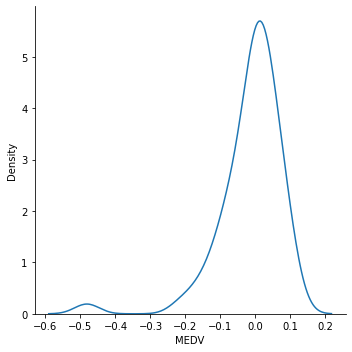

In [29]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind="kde")

In [30]:
from sklearn.metrics import r2_score

In [31]:
score=r2_score(ridge_pred,y_test)

In [32]:
score

0.9999079655523063

## lasso 

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso=Lasso()

In [37]:
parameters={'alpha':[1,2,3,5,10,20,30,50,100,80,90]}
lassoCv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassoCv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 50, 100, 80, 90]},
             scoring='neg_mean_squared_error')

In [39]:
print(lassoCv.best_params_)

{'alpha': 1}


In [40]:
print(lassoCv.best_score_)

-1.0256379873327208


In [43]:
lasso_pred=lassoCv.predict(X_test)

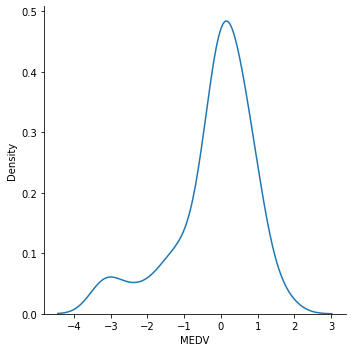

In [44]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind="kde")